<a href="https://colab.research.google.com/github/saisuresh1999/Assignment/blob/master/PredictiveAnalysisUpdated2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from random import random
import warnings
from math import sqrt
import matplotlib
import numpy
import statsmodels
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import scipy
import sklearn

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing




from statsmodels.tsa.stattools import adfuller


In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/saisuresh1999/Assignment/master/mouldDataSet.csv")

In [0]:
data = data.fillna(0)

In [50]:
data.pop('PART NO')
data.pop('Part wt')
data.pop('Ton')
data.pop('cycle time')
prev_year_cum=data.pop('Cummulative 2018')
data.pop('Cum Jan')
data.pop('Cum Feb')
data.pop('Cum Mar')
data.pop('Cum Apr')
data.pop('Cum May')
data.pop('Cum Jun')
data.pop('Cum Jul')
data.pop('Cum Aug')
data.pop('Cum Sep')
data.pop('Cum Oct')
data.pop('Cum Nov')
data.pop('Cum Dec')
cur_year_cum=data.pop('Cummulative 2019')
total=data.pop('Total Shots till Dec 2019')
data.pop('SL. NO.')
data.pop('ASSETS TAG NO.')
data.pop('runner wt')


0      2.00
1      1.90
2      3.00
3      2.00
4      4.00
       ... 
159    2.15
160    1.00
161    3.00
162    5.00
163    0.00
Name: runner wt, Length: 164, dtype: float64

In [51]:
data.pop('No of Parts')

0        1
1        2
2        3
3        4
4        5
      ... 
159    160
160    161
161    162
162    163
163    164
Name: No of Parts, Length: 164, dtype: int64

In [52]:
data.pop('Oct-19')
data.pop('Nov-19')
data.pop('Dec-19')


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
159    0.0
160    0.0
161    0.0
162    0.0
163    0.0
Name: Dec-19, Length: 164, dtype: float64

In [0]:
train_dataset=data.transpose()

In [54]:
train_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163
Part Description,Back Plate Splendor,Back Plate Nitro,Base G&S PPCP IFB White,HOUSING ABS SE BLACK,Body (G) - Trio (Green),Body G - Trio (S.Tap),Body - Star,Bottle Big,Lid Botle CG (Blue),0,Bottle Small,Bottom plate popular,Bottom Plate New (G) - IFB White,Bottom Plate Neo,Bottom plate xpro,Fp bowl coupling zodiac,Fp bowl handle zodiac,Bush holder taurus,Bearing holder zodiac,Bottom Plate C.M,C.G Lid Silver,BODY POPULAR,Clamp Micro Switch Nitro,Clamp Micro Switch Nitro,Lid - Coffee Maker,Filter Lid C.M - (W),Filter Lid C.M - (B),Condensor Unit for C.M (W),Condensor Unit for C.M (B),Fp coupler zodiac,Cut Out Lock,Dome 1.0Ltr Silver,Dome 1.0Ltr Silver with Gasket,Dome 1.0L Nitro,Dome 1Ltr - Splendor,Dome 1.25 Ltr - Crown,Dome P.P.C.P 1.5 Ltr - Preethi,Dome 1.5 Royale,Dome Gasket 0.33 Ltr (LDPE),Dome Gasket 0.5Ltr (LDPE),...,Switch Knob - Lavender,Rotary Switch Knob Leaf,Rotary Switch Knob Leaf,Switch knob zodiac,Switch Knob Crown,Switch Knob XPRO,Top cap,Top Cover XPRO,Dome Lid Clear San,Insert Top Cover XPRO,Indicator cover zodiac,Body - CAFEZEST (W),Body - CAFEZEST (B),pusher zodiac,Lid bottle cg,switch knob leaf,Jar coupler 12mm new,Motor coupler 12mm new,leg insert top,leg insert bottom,Nylon Bush,Fan axial,Lid C.G 0.33 Ltr,Lid 0.33 Ltr Spice with Gasket,Lid 0.33 Ltr Neo,Lid 0.33 Ltr Crown,Lid 0.2 Ltr Blubeery with Gasket,housing crown,dome lid clear san,base C and M,LID 0.33,HOUSING ABS BIG BLK,HOUSING ABS BIG BLUE,HOUSING ABS BIG GREEN,housing abs 0.5 blk,housing abs 0.5 blue,housing HL,Motor fixing stand,Filter - S.E (Interlock),Filter - S.E Steele
Jan-19,0,0,10913,0,16862,0,0,11651,1554,0,2409,12788,6652,0,6019,0,12950,6400,0,0,0,12359,0,0,0,0,0,1950,0,6036,0,420,0,0,0,1841,0,2358,0,0,...,0,0,5966,0,3350,1444,22813,4940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Feb-19,0,0,2435,0,11055,0,0,6273,3673,0,0,15974,12437,0,2315,1420,17850,16506,3098,740,7001,11135,0,1675,0,1095,0,1350,0,4966,0,4509,0,1072,0,10552,3696,2858,0,0,...,0,0,0,3756,16454,1400,15524,4572,2400,0,2485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mar-19,0,0,18400,0,16180,0,0,11050,5950,0,1600,29000,15600,0,4000,2375,12080,13100,5250,1200,7250,24400,0,752,0,800,0,1220,0,6600,0,4804,0,0,0,13400,2400,5400,7000,0,...,700,0,4200,3550,7400,1862,18800,11976,1950,7200,2800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Apr-19,0,0,14204,0,9350,0,0,10800,4200,0,1000,27300,8950,0,6500,3300,12300,12000,6100,1600,6400,18100,0,1800,600,2100,0,1512,0,6534,0,3800,0,0,0,8800,0,6900,2200,0,...,0,0,3900,2800,6300,3200,21200,5500,1350,4800,3750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
May-19,0,0,13200,0,9800,0,0,11500,4800,0,0,27000,11677,0,6300,2800,8940,22600,6780,0,3906,18200,0,950,800,2550,0,0,0,5800,0,5200,0,0,0,5560,0,6100,4100,500,...,300,0,6600,3750,3600,2100,17600,6600,2800,4600,3800,0,0,0,0,0,0,0,0,0,0,8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jun-19,0,0,14670,0,5917,0,0,10030,0,0,940,28190,6330,0,5070,5461,9334,16808,7500,0,3560,13840,0,3298,0,0,0,0,0,4850,0,0,0,0,0,5150,3090,3260,1025,0,...,0,0,6507,5605,16887,200,12993,5880,0,0,3965,0,0,16177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14400,0,0,0,0,0,0,0,0
Jul-19,0,0,14146,0,11241,0,0,8250,4910,0,1250,21180,14335,0,4664,3190,12464,15127,750,0,10945,21385,0,0,1340,2110,0,3709,0,3190,0,3150,0,0,0,7077,3127,5380,0,638,...,0,0,1335,0,2923,1605,10996,2131,0,2888,4300,0,0,13934,0,0,0,0,0,0,0,0,0,0,0,0,0,18190,0,2070,0,21366,0,0,300,0,320,0,0,0
Aug-19,0,0,12026,0,11694,0,0,6190,0,0,1700,20170,13645,0,3350,3603,10003,14500,6700,2030,0,13232,0,0,0,5560,0,2660,0,7270,0,790,0,1485,0,14464,3920,2265,2113,0,...,850,0,3844,5498,6988,2050,14585,5880,0,11033,8570,0,0,12760,0,0,0,0,0,0,0,0,0,0,0,0,0,24025,1

In [55]:
sample_train=train_dataset[4]
sample_train

Part Description    Body (G) - Trio (Green)
Jan-19                                16862
Feb-19                                11055
Mar-19                                16180
Apr-19                                 9350
May-19                                 9800
Jun-19                                 5917
Jul-19                                11241
Aug-19                                11694
Sep-19                                13129
Name: 4, dtype: object

In [56]:
sample_train = sample_train.iloc[1:]
sample_train

Jan-19    16862
Feb-19    11055
Mar-19    16180
Apr-19     9350
May-19     9800
Jun-19     5917
Jul-19    11241
Aug-19    11694
Sep-19    13129
Name: 4, dtype: object

In [57]:
print(sample_train.shape)

(9,)


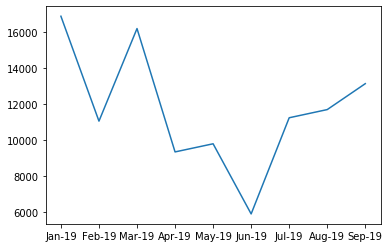

In [58]:
# plot
plt.plot(sample_train)
plt.show()

In [0]:
# prepare data
X = sample_train.values
X = X.astype('float32')


train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]

In [60]:
train

array([16862., 11055., 16180.,  9350.,  9800.,  5917.], dtype=float32)

In [61]:
test

array([11241., 11694., 13129.], dtype=float32)

In [97]:
X

array([16862., 11055., 16180.,  9350.,  9800.,  5917., 11241., 11694.,
       13129.], dtype=float32)

In [63]:
#######################        ARIMA Model           ############################
history = [x for x in train]*10
predictions = list()
for i in range(4):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=False)
 
	yhat = model_fit.forecast()[0]

	predictions.append(yhat)
	if i<3:
		history.append(test[i])
		obs = test[i]
		if i==0:
			print('>July: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
		elif i==1:
			print('>August: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
		else:
			print('>September: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	else:
		print("October %.3f"%(yhat))
		
 
#evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions[:-1]))
print('Test RMSE: %.3f' % rmse)
 


	

>July: Predicted=11716.226, Expected=11241
>August: Predicted=10275.146, Expected=11694
>September: Predicted=13184.403, Expected=13129
October 9223.195
Test RMSE: 864.495


In [79]:
#######################        AR Model       ############################
# fit model
dataa = [x for x in train]*10
predictions = list()
for i in range(4):
  model = AR(dataa) 
  model_fit = model.fit()
  # make prediction
  yhat = model_fit.predict(len(dataa), len(dataa))
  predictions.append(yhat)
  dataa.append(yhat)
  if i<3:
	  obs = test[i]
	  if i==0:
	    print('>July: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  elif i==1:
		  print('>August: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  else:
	    print('>September: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
  else:
    print("October %.3f"%(yhat))
#evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions[:-1]))
print('Test RMSE: %.3f' % rmse)


>July: Predicted=16862.000, Expected=11241
>August: Predicted=11055.000, Expected=11694
>September: Predicted=16180.000, Expected=13129
October 9350.000
Test RMSE: 3710.910


In [84]:
#######################        MA Model       ############################
# fit model
dataa = [x for x in train]*10

predictions = list()
for i in range(4):
  model = ARMA(dataa,order=(0, 1)) 
  model_fit = model.fit(disp=False)
  # make prediction
  yhat = model_fit.predict(len(dataa), len(dataa))
  predictions.append(yhat)
  dataa.append(yhat)
  if i<3:
	  obs = test[i]
	  if i==0:
	    print('>July: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  elif i==1:
		  print('>August: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  else:
	    print('>September: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
  else:
    print("October %.3f"%(yhat))
#evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions[:-1]))
print('Test RMSE: %.3f' % rmse)


>July: Predicted=17020.389, Expected=11241
>August: Predicted=11443.988, Expected=11694
>September: Predicted=11530.394, Expected=13129
October 11529.029
Test RMSE: 3465.034


In [100]:
#######################        SARIMA Model (Uses both train and test together represented as X)     ############################
# fit model
dataa = [x for x in X]*10 # train is replaced by train+test = X

predictions = list()
for i in range(1):
  model = SARIMAX(dataa, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
  model_fit = model.fit(disp=False)
  # make prediction
  yhat = model_fit.predict(len(dataa), len(dataa))
  predictions.append(yhat)
  dataa.append(yhat)
  print("October %.3f"%(yhat))



October 14633.777


In [105]:
#######################        Simple Exponential Smoothing (SES) Model       ############################
# fit model
dataa = [x for x in train]*10

predictions = list()
for i in range(4):
  model = SimpleExpSmoothing(dataa)
  model_fit = model.fit()
  # make prediction
  yhat = model_fit.predict(len(dataa), len(dataa))
  predictions.append(yhat)
  dataa.append(yhat)
  if i<3:
	  obs = test[i]
	  if i==0:
	    print('>July: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  elif i==1:
		  print('>August: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  else:
	    print('>September: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
  else:
    print("October %.3f"%(yhat))
#evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions[:-1]))
print('Test RMSE: %.3f' % rmse)


>July: Predicted=11527.267, Expected=11241
>August: Predicted=11527.336, Expected=11694
>September: Predicted=11527.380, Expected=13129
October 11527.334
Test RMSE: 944.266


In [108]:
#######################        Holt Winter’s Exponential Smoothing (HWES) Model       ############################
# fit model
dataa = [x for x in train]*10

predictions = list()
for i in range(4):
  model = ExponentialSmoothing(data)
  model_fit = model.fit()
  # make prediction
  yhat = model_fit.predict(len(dataa), len(dataa))
  predictions.append(yhat)
  dataa.append(yhat)
  if i<3:
	  obs = test[i]
	  if i==0:
	    print('>July: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  elif i==1:
		  print('>August: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
	  else:
	    print('>September: Predicted=%.3f, Expected=%3.f' % (yhat, obs))
  else:
    print("October %.3f"%(yhat))
#evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions[:-1]))
print('Test RMSE: %.3f' % rmse)


>July: Predicted=11527.267, Expected=11241
>August: Predicted=11527.267, Expected=11694
>September: Predicted=11527.267, Expected=13129
October 11527.267
Test RMSE: 944.334
